Diabetes Prediction Project

In [119]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import pickle as pkl
import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv('diabetes.csv')
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [28]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [29]:
df.shape

(768, 9)

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [31]:
for i in df.columns[1:6]:
    df[i] = df[i].replace(0,df[i].mean())
    

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.000000,3.000000,6.00000,17.00
Glucose,768.0,121.681605,30.436016,44.000,99.750000,117.000000,140.25000,199.00
BloodPressure,768.0,72.254807,12.115932,24.000,64.000000,72.000000,80.00000,122.00
SkinThickness,768.0,26.606479,9.631241,7.000,20.536458,23.000000,32.00000,99.00
Insulin,768.0,118.660163,93.080358,14.000,79.799479,79.799479,127.25000,846.00
BMI,768.0,32.450805,6.875374,18.200,27.500000,32.000000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.243750,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.000000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000000,0.000000,1.00000,1.00


In [33]:
df.duplicated().sum()

0

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [35]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: >

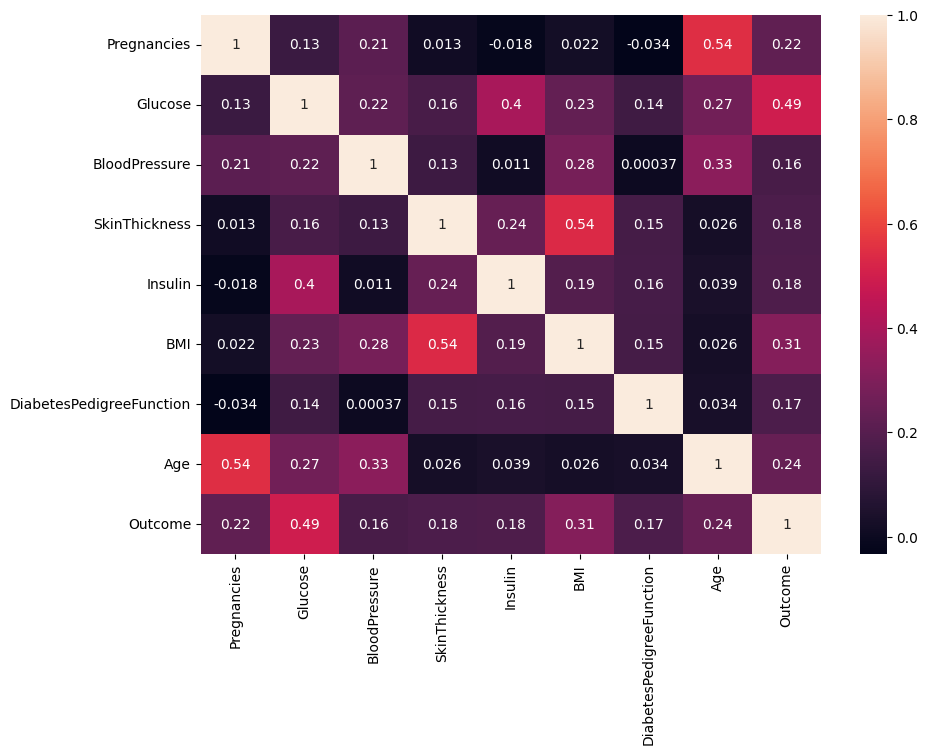

In [36]:
#Checking Correlation
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

In [37]:
#No such relation between parameters
# but BMI and skin thickness has 0.54 correlation and age and pregnancies also have same

<Axes: >

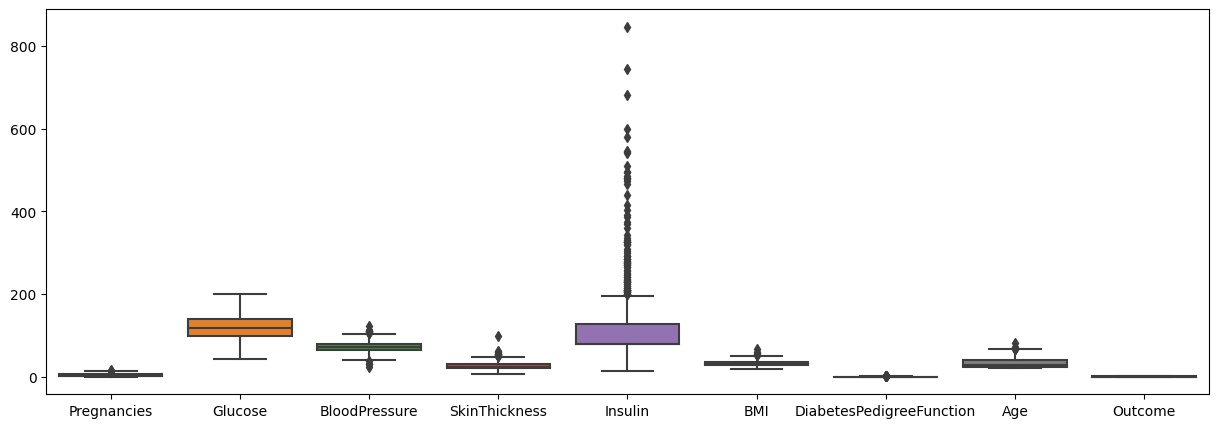

In [38]:
plt.figure(figsize=(15,5))
sns.boxplot(df)

In [39]:
#Insulin has many outliers

In [15]:
##Spliting data in to independent and dependent variables
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [16]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [40]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X,y =  oversample.fit_resample(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']],df['Outcome'])

In [41]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<Axes: >

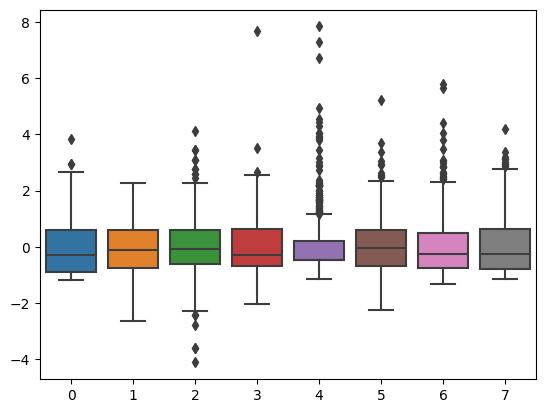

In [44]:
sns.boxplot(X_train_scaled)

In [45]:
#Model training

In [46]:
regressor = LogisticRegression()

In [47]:
parameters = {'penalty':('l1','l2','elasticnet',None),'C':[-1,1,10,100,1000],'solver':('lbfgs','newton-cg','newton-cholesky','sag','liblinear')}

In [48]:
clf = GridSearchCV(regressor,param_grid=parameters,cv=10,verbose=3,scoring='accuracy')

In [49]:
clf.fit(X_train_scaled,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 1/10] END .....C=-1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END .....C=-1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10] END .....C=-1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/10] END .....C=-1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/10] END .....C=-1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 6/10] END .....C=-1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 7/10] END .....C=-1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 8/10] END .....C=-1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 9/10] END .....C=-1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 10/10] END ....C=-1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/10] END .C=-1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/10] END .C=-1, penalty=l1, solver=newt

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [-1, 1, 10, 100, 1000],
                         'penalty': ('l1', 'l2', 'elasticnet', None),
                         'solver': ('lbfgs', 'newton-cg', 'newton-cholesky',
                                    'sag', 'liblinear')},
             scoring='accuracy', verbose=3)

In [50]:
clf.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}

In [51]:
regressor = LogisticRegression(C=1,penalty='l2',solver='lbfgs')
regressor.fit(X_train_scaled,y_train)

LogisticRegression(C=1)

In [121]:
y_pred1 = regressor.predict(X_test_scaled)

In [122]:
acc_lr = accuracy_score(y_pred1,y_test)

In [129]:
print(confusion_matrix(y_pred1,y_test))

[[116  33]
 [ 33 118]]


In [130]:
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       149
           1       0.78      0.78      0.78       151

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



In [56]:
svc = SVC()

In [57]:
parameters = {
    'C':[-10,-1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001],
    'kernel':['poly', 'rbf', 'sigmoid']
}

In [58]:
clf_svc = GridSearchCV(svc,param_grid=parameters,cv=3,verbose=3,scoring='accuracy')

In [59]:
clf_svc.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV 1/3] END .........C=-10, gamma=1, kernel=poly;, score=nan total time=   0.0s
[CV 2/3] END .........C=-10, gamma=1, kernel=poly;, score=nan total time=   0.0s
[CV 3/3] END .........C=-10, gamma=1, kernel=poly;, score=nan total time=   0.0s
[CV 1/3] END ..........C=-10, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 2/3] END ..........C=-10, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 3/3] END ..........C=-10, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 1/3] END ......C=-10, gamma=1, kernel=sigmoid;, score=nan total time=   0.0s
[CV 2/3] END ......C=-10, gamma=1, kernel=sigmoid;, score=nan total time=   0.0s
[CV 3/3] END ......C=-10, gamma=1, kernel=sigmoid;, score=nan total time=   0.0s
[CV 1/3] END .......C=-10, gamma=0.1, kernel=poly;, score=nan total time=   0.0s
[CV 2/3] END .......C=-10, gamma=0.1, kernel=poly;, score=nan total time=   0.0s
[CV 3/3] END .......C=-10, gamma=0.1, kernel=po

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [-10, -1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=3)

In [62]:
clf_svc.best_params_,clf_svc.best_score_

({'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}, 0.7999828815279458)

In [125]:
svc = SVC(C=100,gamma=0.01,kernel='rbf')
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

In [126]:
acc_svc = accuracy_score(y_pred_svc,y_test)

In [127]:
print(classification_report(y_pred_svc,y_test))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78       167
           1       0.72      0.81      0.76       133

    accuracy                           0.77       300
   macro avg       0.77      0.78      0.77       300
weighted avg       0.78      0.77      0.77       300



In [128]:
print(confusion_matrix(y_pred_svc,y_test))

[[124  43]
 [ 25 108]]


In [67]:
treeClassifier = DecisionTreeClassifier()

In [68]:
parameters = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best', 'random'],
    'max_depth':[1,2,3,4,5]
}

In [77]:
clf_decTree = GridSearchCV(DecisionTreeClassifier(),param_grid=parameters,cv=10,verbose=2)

In [84]:
clf_decTree.fit(X_train,y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, s

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             verbose=2)

In [85]:
clf_decTree.best_params_,clf_decTree.best_score_

({'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'},
 0.7714285714285715)

In [86]:
treeClassifier = DecisionTreeClassifier(criterion='entropy',max_depth=4,splitter='best')

In [88]:
treeClassifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [131]:
y_pred_dec = treeClassifier.predict(X_test)
acc_dec = accuracy_score(y_pred_dec,y_test)
print(classification_report(y_pred_dec,y_test))
print(confusion_matrix(y_pred_dec,y_test))

              precision    recall  f1-score   support

           0       0.66      0.85      0.75       116
           1       0.89      0.73      0.80       184

    accuracy                           0.78       300
   macro avg       0.78      0.79      0.77       300
weighted avg       0.80      0.78      0.78       300

[[ 99  17]
 [ 50 134]]


In [111]:
parameters = {
    'var_smoothing':[0.000000001,0.00000001,0.00000001,0.000001,0.00001]
}

In [112]:
nb = GaussianNB()
clf_nb = GridSearchCV(nb,param_grid=parameters,cv=10,verbose=1)

In [113]:
clf_nb.fit(X_train_scaled,y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-08, 1e-06, 1e-05]},
             verbose=1)

In [96]:
clf_nb.best_params_,clf_nb.best_score_

({'var_smoothing': 1e-09}, 0.7328571428571429)

In [132]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB(var_smoothing=1e-09)
nb.fit(X_train_scaled,y_train)
y_pred_nb = nb.predict(X_test_scaled)
acc_nb = accuracy_score(y_pred_nb,y_test)
print(classification_report(y_pred_nb,y_test))
print(confusion_matrix(y_pred_nb,y_test))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       161
           1       0.74      0.81      0.77       139

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300

[[122  39]
 [ 27 112]]


In [115]:
parameters = {
    'alpha':[-1,1,10,100,1000]
}

In [116]:
nb_b = BernoulliNB()
clf_nbb = GridSearchCV(nb_b,param_grid=parameters,cv=10,verbose=1)
clf_nbb.fit(X_train_scaled,y_train)


Fitting 10 folds for each of 5 candidates, totalling 50 fits


GridSearchCV(cv=10, estimator=BernoulliNB(),
             param_grid={'alpha': [-1, 1, 10, 100, 1000]}, verbose=1)

In [117]:
clf_nbb.best_params_,clf_nbb.best_score_

({'alpha': 1}, 0.7100000000000001)

In [133]:
from sklearn.naive_bayes import BernoulliNB
nbb = BernoulliNB(alpha=1)
nbb.fit(X_train_scaled,y_train)
y_pred_nbb = nbb.predict(X_test_scaled)
acc_nbb = accuracy_score(y_pred_nbb,y_test)
print(classification_report(y_pred_nbb,y_test))
print(confusion_matrix(y_pred_nbb,y_test))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       145
           1       0.76      0.74      0.75       155

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300

[[109  36]
 [ 40 115]]


In [137]:
accuracy = {"logistic regression":acc_lr,"SVC":acc_svc,"Decision Tree":acc_dec,"Naive Bayes Gaussian":acc_nb,"Naive Bayes Bernauli":acc_nbb}

In [142]:
accuracy

{'logistic regression': 0.78,
 'SVC': 0.7733333333333333,
 'Decision Tree': 0.7766666666666666,
 'Naive Bayes Gaussian': 0.78,
 'Naive Bayes Bernauli': 0.7466666666666667}

In [143]:
pkl.dump(regressor,open('regressor.pkl','wb'))
pkl.dump(treeClassifier,open('tree.pkl','wb'))
pkl.dump(nb,open('naive.pkl','wb'))

In [144]:
pkl.dump(scaler,open('scaler.pkl','wb'))

In [145]:
a = 10

In [ ]:
Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome

In [147]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [146]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')